# Import neccesary packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import pandas as pd

### Loading data
There are four dataframes named 'reg#.csv' in synth_data.

In [2]:
df=pd.read_csv('./synth_data/reg5.csv')
x,y=df['x'].values,df['y'].values
print (type(x),x.shape,type(y),y.shape)

<class 'numpy.ndarray'> (10000,) <class 'numpy.ndarray'> (10000,)


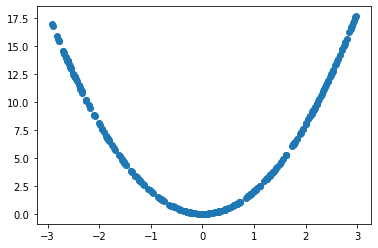

In [3]:
choice=np.random.choice(np.arange(len(x)),300)
plt.scatter(x[choice],y[choice])

In [4]:
def polynomial(x,coeffs):
    '''coeffs is a coeeficients dict with int keys for power and coeeficients as
    values
    '''
    total=tf.zeros(x.shape)
    for power,coeff in coeffs.items():
        total += coeff*x**power
    return total

tf.Tensor(
[-12.240946  -26.509281  -28.60805   ...  76.52461   -10.819743
  -3.1765008], shape=(10000,), dtype=float32)


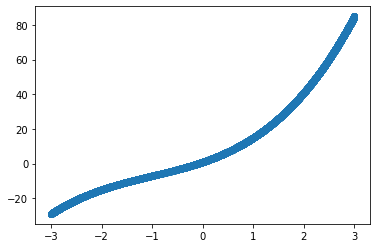

In [5]:
tf_x,tf_y=tf.constant(x,dtype=tf.float32),tf.constant(y,dtype=tf.float32)
y_pred=polynomial(tf_x,{0:1.,1:10.,2:3,3:1})
print (y_pred)
plt.scatter(tf_x.numpy(),y_pred.numpy())

## Problem definition
We are given a dataset which we have loaded above, and want to find a polynomial function which best fits the data. The degree of the polynomial have to be chosen a priori based on our knowledge of the data. Due to the presence of noise, it may not be straightforward to notice the relationship between the dependent variabe $y$ and the independent variable $x$. Any general polynomial of degree $d$ is 
\begin{equation}
\hat{y}=\sum_{i=0}^{i=d}\; a_i\,x^i
\end{equation} 
The values of $a$ and $b$ are unknown and have to be fixed by minimizing the eror between $\hat{y}$ the polynomial-model predicted value and $y$, the value given in the dataset. Any function which is a well-defined metric suffices as the loss function, the most commonly used is the mean squared error defined as 
\begin{equation}
L(a_0,a_1,...,a_d)= \frac{1}{N} \sum_{i=1}^{i=N} \;(\hat{y}(x_i|a_0,a_1,....a_d)-y_i)^2
\end{equation} 
Note that since we have gone to a non-linear definition of the predicted function and the increase in number of tunable parameters $a_i$, the nice features of linear regression is lost and the convergence is highly dependent on the initialized point in the weight space and the nature of the data. Since we do not know the power of the polynomial or if it follows a polynomial expression at all, the convergence of the polynomial model is not always guaranteed. One of the power of neural networks is the ability to learn any given function is a bounded region of the input without any knowledge of its exact form.

In [6]:
d=2
variables={i: tf.Variable(np.random.uniform(-10,10),dtype=tf.float32) for i in range(d+1)}
lr=0.0001
loss_threshold=0.001
verbose_freq=1000
variables

{0: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.4786103>,
 1: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.785362>,
 2: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-7.569113>}

### Gradient Descent
\begin{equation}
a^{t+1}_i=\omega^t_i-\gamma \frac{\partial L}{\partial \omega^t_i}
\end{equation} 
$\gamma$ is the learning rate.

tf.Tensor(
[ -7.714364   -36.509697   -40.50798    ... -91.34064     -5.1589193
   0.46039546], shape=(10000,), dtype=float32)


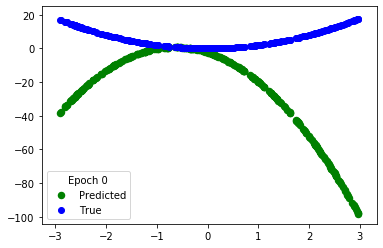

tf.Tensor([13.559483  29.068604  30.874493  ... -1.9867411 11.636003   2.309086 ], shape=(10000,), dtype=float32)


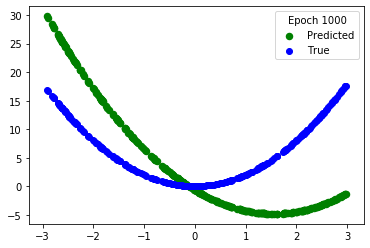

tf.Tensor([10.506826 24.971048 26.722637 ...  7.751297  8.818984  1.341618], shape=(10000,), dtype=float32)


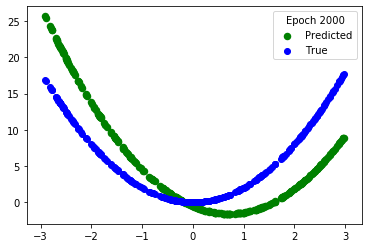

tf.Tensor([ 8.309295  21.27401   22.877556  ... 11.686361   6.84923    0.7550539], shape=(10000,), dtype=float32)


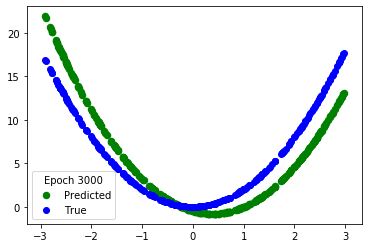

tf.Tensor(
[ 7.0898056  19.181578   20.697523   ... 13.790045    5.760113
  0.44548813], shape=(10000,), dtype=float32)


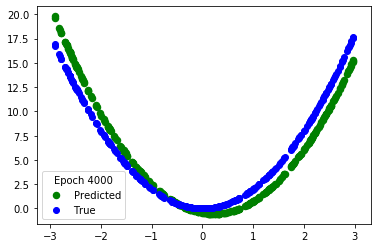

tf.Tensor([ 6.4254727 18.021307  19.487041  ... 14.936455   5.1691504  0.2893749], shape=(10000,), dtype=float32)


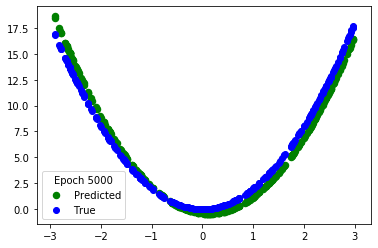

tf.Tensor(
[ 6.066376   17.375832   18.812206   ... 15.5591545   4.851844
  0.21653572], shape=(10000,), dtype=float32)


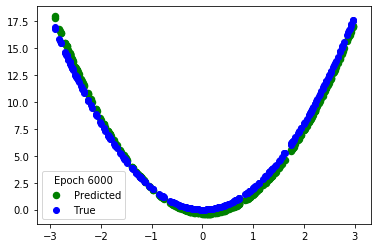

tf.Tensor(
[ 5.874586   17.014086   18.432718   ... 15.894777    4.684357
  0.18838683], shape=(10000,), dtype=float32)


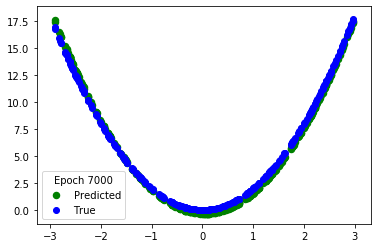

tf.Tensor(
[ 5.774219   16.808609   18.215994   ... 16.072924    4.5985894
  0.18383631], shape=(10000,), dtype=float32)


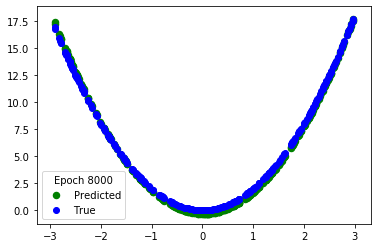

tf.Tensor(
[ 5.7236843  16.689566   18.089397   ... 16.165035    4.55722
  0.19136024], shape=(10000,), dtype=float32)


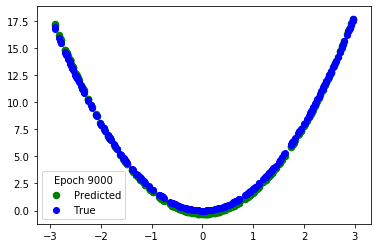

tf.Tensor(
[ 5.700276   16.618855   18.013302   ... 16.210663    4.539873
  0.20470792], shape=(10000,), dtype=float32)


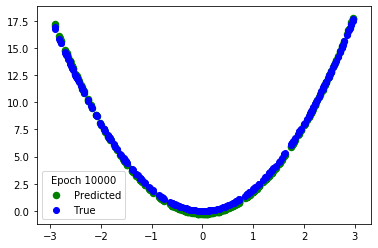

tf.Tensor(
[ 5.6913033  16.574816   17.965147   ... 16.230831    4.535195
  0.22049247], shape=(10000,), dtype=float32)


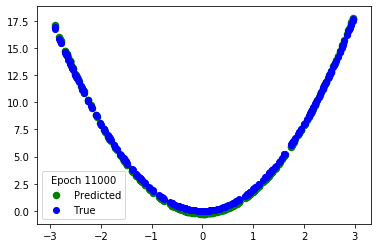

tf.Tensor(
[ 5.6899567  16.545889   17.932896   ... 16.237438    4.5370917
  0.23692758], shape=(10000,), dtype=float32)


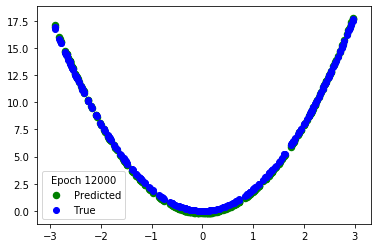

tf.Tensor(
[ 5.6925955  16.525902   17.910128   ... 16.2372      4.5423045
  0.25309014], shape=(10000,), dtype=float32)


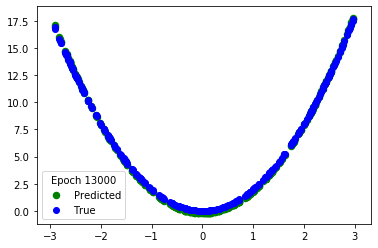

tf.Tensor(
[ 5.697082   16.510979   17.892786   ... 16.233337    4.5489473
  0.26851386], shape=(10000,), dtype=float32)


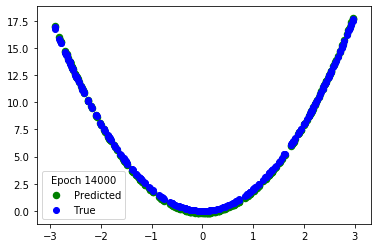

tf.Tensor(
[ 5.7023396  16.499172   17.87883    ... 16.227797    4.5560694
  0.28299654], shape=(10000,), dtype=float32)


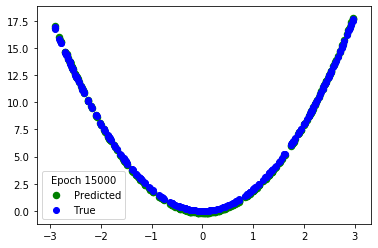

tf.Tensor([ 5.707796  16.489386  17.867113  ... 16.221626   4.5631742  0.2964711], shape=(10000,), dtype=float32)


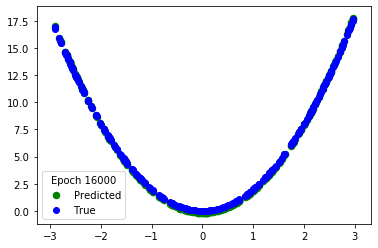

tf.Tensor(
[ 5.713147   16.48096    17.85694    ... 16.21535     4.570004
  0.30893987], shape=(10000,), dtype=float32)


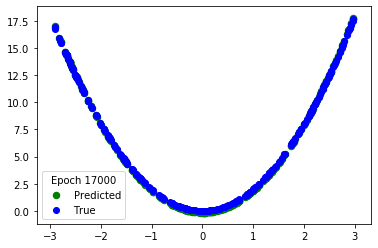

tf.Tensor(
[ 5.7182245  16.473469   17.847847   ... 16.209185    4.576424
  0.32043943], shape=(10000,), dtype=float32)


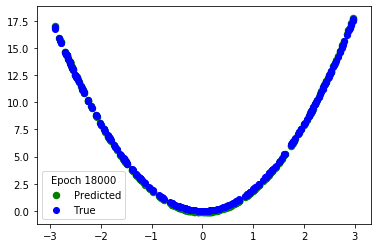

tf.Tensor(
[ 5.722966   16.466703   17.839615   ... 16.203285    4.582393
  0.33102268], shape=(10000,), dtype=float32)


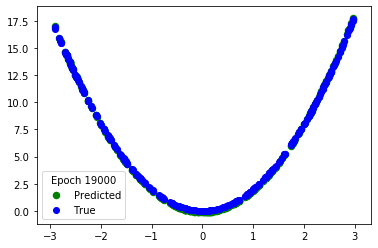

tf.Tensor(
[ 5.727506   16.46095    17.83255    ... 16.198124    4.5880284
  0.34076613], shape=(10000,), dtype=float32)


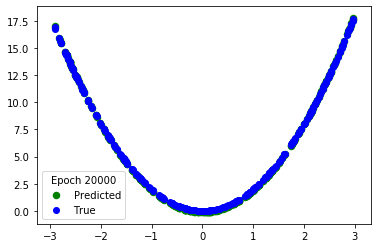

tf.Tensor([ 5.7316246 16.455482  17.82586   ... 16.193096   4.593167   0.3497191], shape=(10000,), dtype=float32)


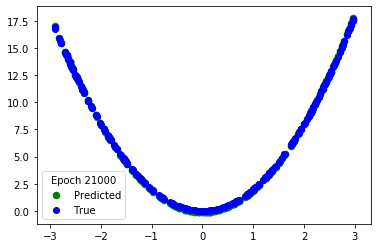

tf.Tensor(
[ 5.735364   16.450336   17.819576   ... 16.188297    4.5978513
  0.35793304], shape=(10000,), dtype=float32)


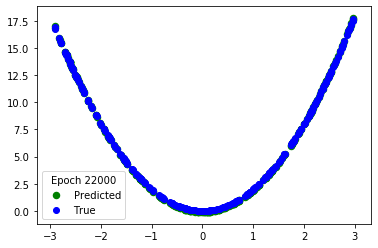

tf.Tensor(
[ 5.7389545  16.446035   17.814268   ... 16.184278    4.60228
  0.36549407], shape=(10000,), dtype=float32)


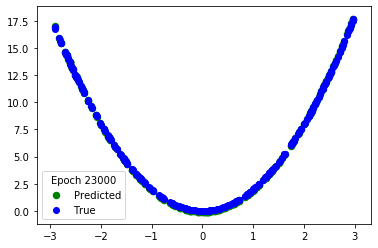

tf.Tensor(
[ 5.742074   16.441584   17.80885    ... 16.180077    4.6062036
  0.37242025], shape=(10000,), dtype=float32)


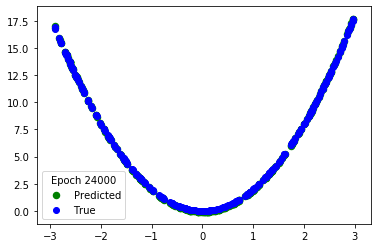

tf.Tensor(
[ 5.7451334  16.438042   17.804462   ... 16.17674     4.6099644
  0.37879863], shape=(10000,), dtype=float32)


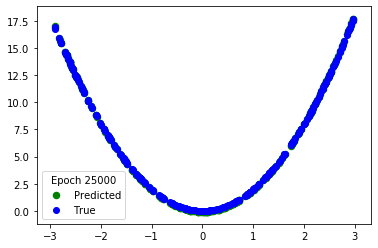

tf.Tensor(
[ 5.7477865  16.434357   17.79997    ... 16.173254    4.613291
  0.38463598], shape=(10000,), dtype=float32)


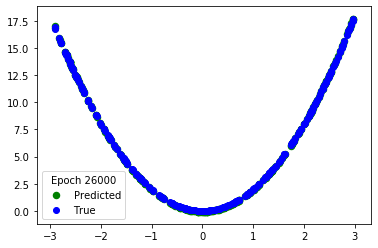

tf.Tensor(
[ 5.7503114  16.431204   17.796091   ... 16.17027     4.616419
  0.39001492], shape=(10000,), dtype=float32)


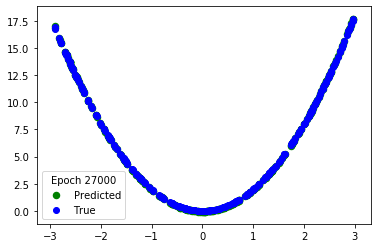

In [ ]:
for i in range(100000):
    with tf.GradientTape() as tape:
        y_pred=polynomial(tf_x,variables)
        loss=tf.math.reduce_mean((y_pred-tf_y)**2)
        grad = tape.gradient(loss, variables)
    for key,val in variables.items():
        variables[key].assign(variables[key]-lr*grad[key])
    if loss<loss_threshold:
        break
    if (i)%verbose_freq==0:
        #print (y_pred)
        #print ('Loss: ',
        plt.scatter(tf_x.numpy()[choice],y_pred.numpy()[choice],c='g',label='Predicted',linewidth=1.5)
        plt.scatter(tf_x.numpy()[choice],tf_y.numpy()[choice],c='b',label='True')
        plt.legend(title=f"Epoch {i}")
        plt.show()
print ('Converged...\n\t loss:',loss.numpy())
for key,val in variables.items():
    print (f'power: {key} coeff:{val}')